11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3844 - val_loss: 0.1870
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1772 - val_loss: 0.1515
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1477 - val_loss: 0.1327
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1310 - val_loss: 0.1210
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1203 - val_loss: 0.1129
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1125 - val_loss: 0.1071
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1071 - val_loss: 0.1028
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1032 - val_loss: 0.0996
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0980 - val_loss: 0.0956
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0967 - val_loss: 0.0945


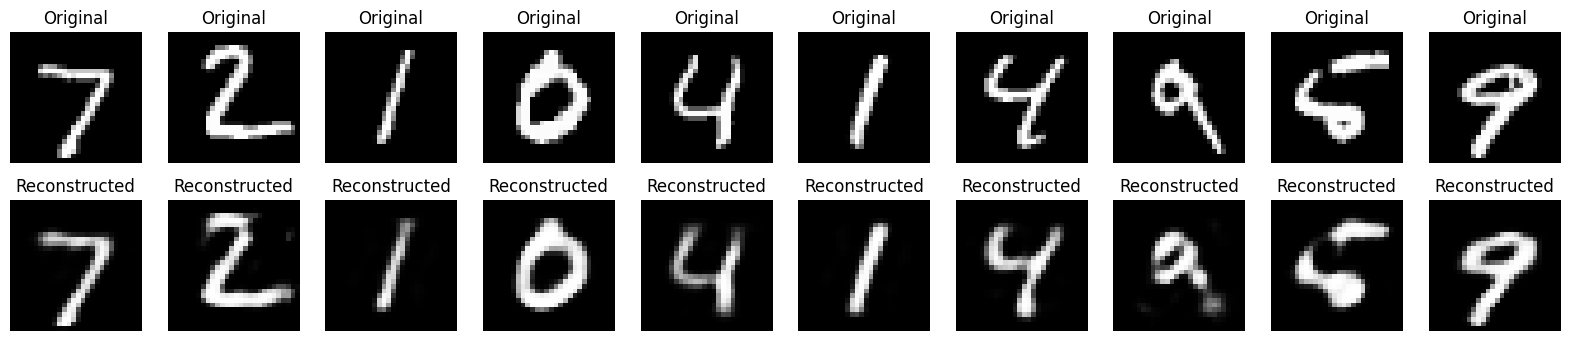

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3721 - val_loss: 0.2110
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2002 - val_loss: 0.1758
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1722 - val_loss: 0.1541
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1518 - val_loss: 0.1405
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1394 - val_loss: 0.1327
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1325 - val_loss: 0.1274
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1278 - val_loss: 0.1240
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1245 - val_loss: 0.1216
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1223 - val_loss: 0.1203
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1212 - val_loss: 0.1194
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1205 - val_loss: 0.1189
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

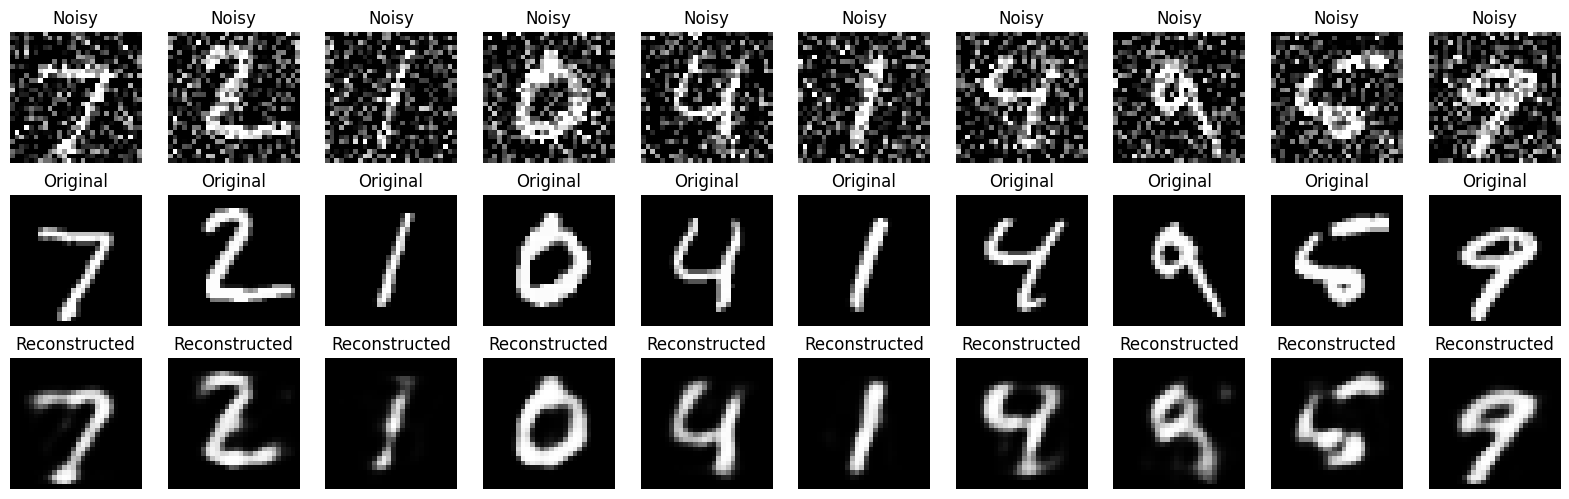


1. When the bottleneck size is reduced, the model captures fewer features, leading to a loss in reconstruction quality. 
   However, a smaller bottleneck can improve compression efficiency.

2. Adding noise to the input images introduces challenges for the autoencoder. The reconstruction quality decreases for higher noise levels, 
   but the model learns to denoise effectively if trained appropriately.

3. A denoising autoencoder would work better for noisy real-world data, such as medical images, because it is explicitly trained to handle noise. 
   It can reconstruct clean images from noisy inputs by learning noise-robust features.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28 * 28))
x_test = np.reshape(x_test, (len(x_test), 28 * 28))

# Part 1: Basic Autoencoder
# Define the autoencoder architecture
input_img = Input(shape=(784,))
encoded = Dense(32, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Reconstruct images using the trained autoencoder
reconstructed_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plot_images(x_test, reconstructed_imgs)

# Part 2: Denoising Autoencoder
# Add noise to the data
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the denoising autoencoder architecture
input_noisy = Input(shape=(784,))
encoded_noisy = Dense(32, activation='relu')(input_noisy)
decoded_noisy = Dense(784, activation='sigmoid')(encoded_noisy)

# Create the denoising autoencoder model
denoising_autoencoder = Model(input_noisy, decoded_noisy)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the denoising autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Reconstruct images using the denoising autoencoder
reconstructed_noisy_imgs = denoising_autoencoder.predict(x_test_noisy)

# Plot noisy, clean, and reconstructed images
def plot_denoising(noisy, original, reconstructed, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        # Noisy images
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(noisy[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy")
        plt.axis('off')

        # Original images
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

plot_denoising(x_test_noisy, x_test, reconstructed_noisy_imgs)

# Part 3: Analysis
analysis = """
1. When the bottleneck size is reduced, the model captures fewer features, leading to a loss in reconstruction quality.
   However, a smaller bottleneck can improve compression efficiency.

2. Adding noise to the input images introduces challenges for the autoencoder. The reconstruction quality decreases for higher noise levels,
   but the model learns to denoise effectively if trained appropriately.

3. A denoising autoencoder would work better for noisy real-world data, such as medical images, because it is explicitly trained to handle noise.
   It can reconstruct clean images from noisy inputs by learning noise-robust features.
"""
print(analysis)



Training Autoencoder with latent dimension: 16
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.4239 - val_loss: 0.2173
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2062 - val_loss: 0.1800
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1757 - val_loss: 0.1609
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1589 - val_loss: 0.1505
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1502 - val_loss: 0.1449
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1454 - val_loss: 0.1416
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1422 - val_loss: 0.1393
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1400 - val_loss: 0.1374
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1382 - val_loss: 0.1357
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1369 - val_loss: 0.1343
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


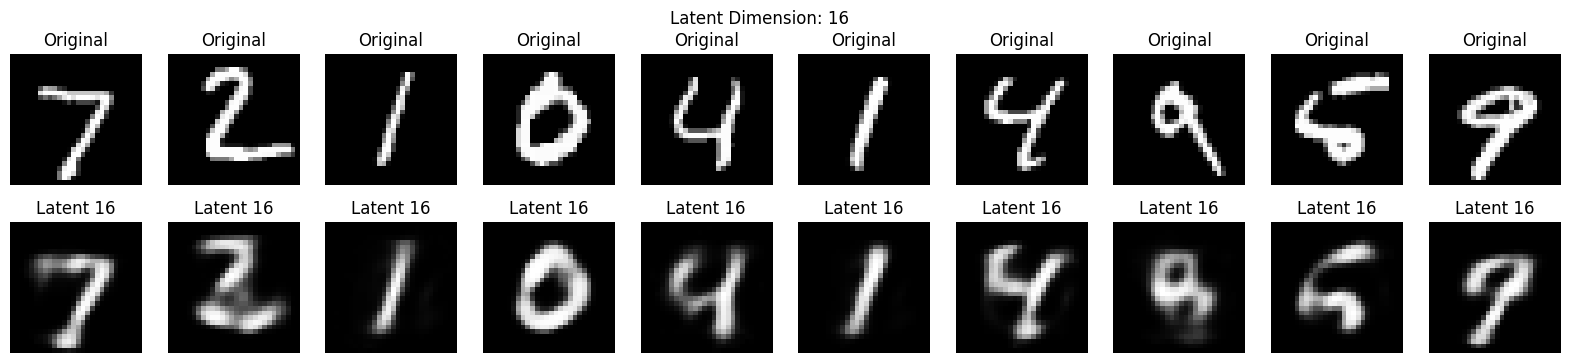


Training Autoencoder with latent dimension: 32
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3836 - val_loss: 0.1868
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1778 - val_loss: 0.1530
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1488 - val_loss: 0.1339
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1317 - val_loss: 0.1216
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1208 - val_loss: 0.1134
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1131 - val_loss: 0.1075
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1078 - val_loss: 0.1032
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1033 - val_loss: 0.1000
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1006 - val_loss: 0.0974
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0982 - val_loss: 0.0957
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


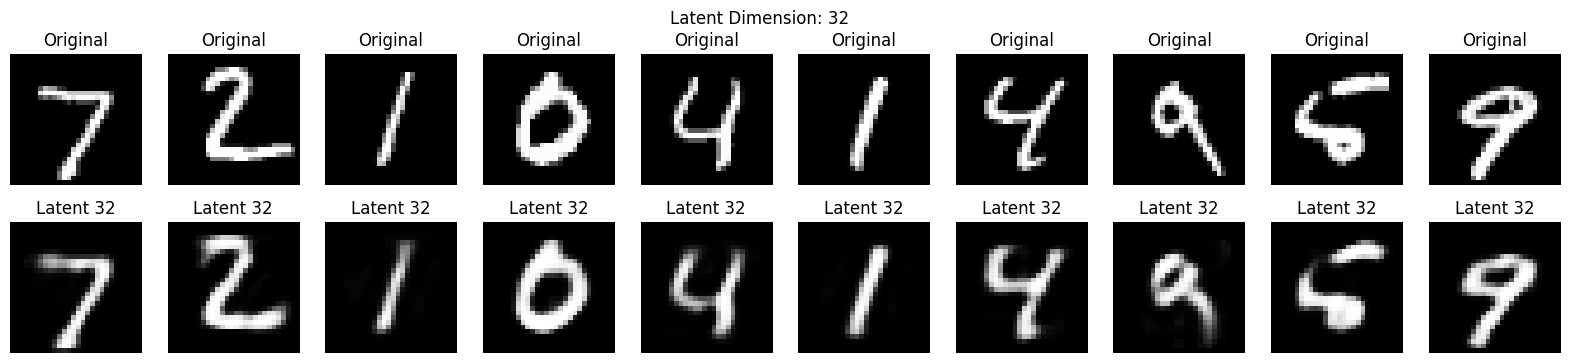


Training Autoencoder with latent dimension: 64
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3473 - val_loss: 0.1638
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.1546 - val_loss: 0.1278
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1234 - val_loss: 0.1088
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1070 - val_loss: 0.0976
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0966 - val_loss: 0.0900
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0895 - val_loss: 0.0849
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0849 - val_loss: 0.0814
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0815 - val_loss: 0.0790
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0794 - val_loss: 0.0774
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0779 - val_loss: 0.0762
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


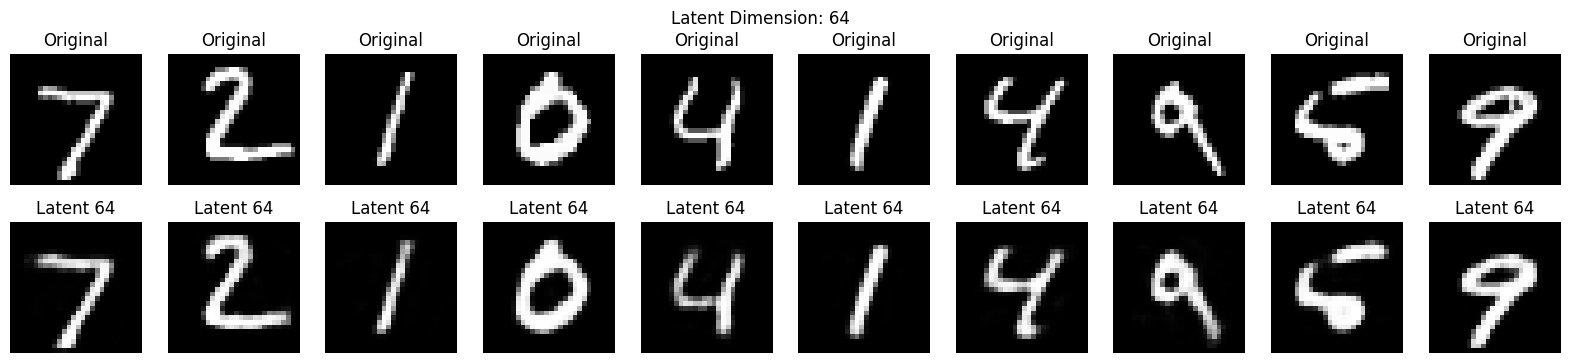

In [ ]:
#Q1)Implementing a Basic Autoencoder on the MNIST dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))  # (60000, 784)
x_test = x_test.reshape((len(x_test), -1))    # (10000, 784)

# Function to build autoencoder model with configurable latent dimension
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

# Try with latent dimensions 16, 32, 64
latent_dims = [16, 32, 64]

for dim in latent_dims:
    print(f"\nTraining Autoencoder with latent dimension: {dim}")
    autoencoder = build_autoencoder(dim)
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1)

    # Reconstruct test images
    decoded_imgs = autoencoder.predict(x_test)

    # Plot original vs reconstructed images
    n = 10  # Number of digits to display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
        plt.title("Original")
        plt.axis("off")

        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
        plt.title(f"Latent {dim}")
        plt.axis("off")
    plt.suptitle(f"Latent Dimension: {dim}")
    plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3666 - val_loss: 0.2159
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2056 - val_loss: 0.1827
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1785 - val_loss: 0.1619
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1597 - val_loss: 0.1490
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.1482 - val_loss: 0.1420
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1420 - val_loss: 0.1372
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1377 - val_loss: 0.1337
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1340 - val_loss: 0.1314
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1314 - val_loss: 0.1297
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1303 - val_loss: 0.1283
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


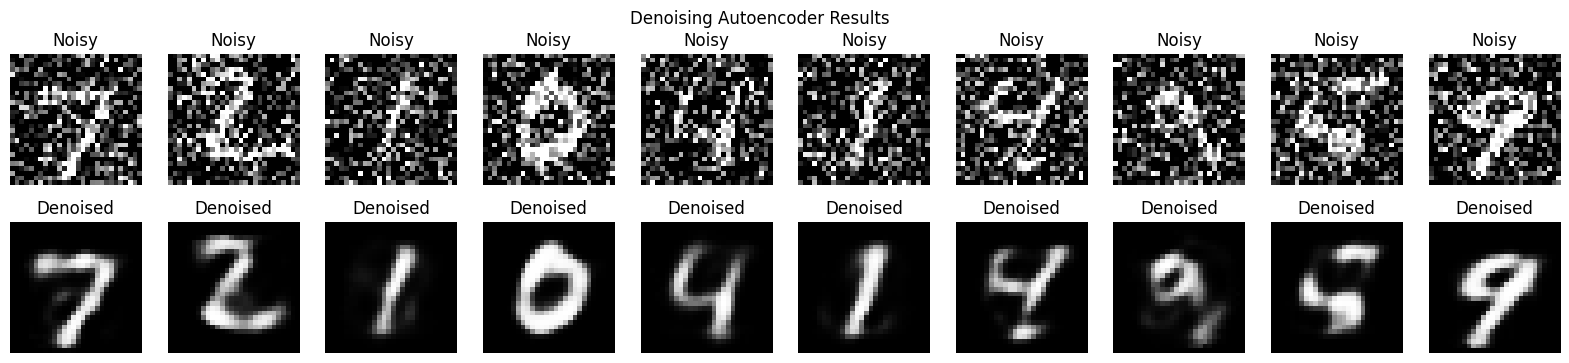

In [ ]:
#Q2)Implementing a Denoising Autoencoder, using the MNIST dataset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))  # (60000, 784)
x_test = x_test.reshape((len(x_test), -1))    # (10000, 784)

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=noise_factor, size=x_train.shape)
x_test_noisy = x_test + np.random.normal(loc=0.0, scale=noise_factor, size=x_test.shape)

# Clip values to keep in [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Build the denoising autoencoder
def build_denoising_autoencoder(latent_dim=32):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)
    autoencoder = Model(inputs=input_img, outputs=decoded)
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')
    return autoencoder

# Instantiate and train
autoencoder = build_denoising_autoencoder(latent_dim=32)
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=1)

# Predict denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Plot noisy vs denoised images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
plt.suptitle("Denoising Autoencoder Results")
plt.show()

In [ ]:
#Q3)RNN with LSTM for Character-Level Text Generation
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import random
import sys

# 1. Load dataset (using a sample from TensorFlow or custom file)
path = tf.keras.utils.get_file("shakespeare.txt",
    "https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt")
text = open(path, 'rb').read().decode(encoding='utf-8').lower()

# 2. Character Mapping
chars = sorted(list(set(text)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}
idx_to_char = {i: ch for i, ch in enumerate(chars)}

# Prepare training data
seq_length = 100
step = 1
sentences = []
next_chars = []

for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

print(f"Number of sequences: {len(sentences)}")

X = np.zeros((len(sentences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)

for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# 3. Define LSTM Model
model = Sequential([
    LSTM(128, input_shape=(seq_length, len(chars))),
    Dense(len(chars), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

# 4. Train the Model
model.fit(X, y, batch_size=128, epochs=10)

# 5. Text Generation with Temperature Scaling
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(chars), p=preds)

def generate_text(length=400, temperature=1.0):
    start_index = random.randint(0, len(text) - seq_length - 1)
    generated = ''
    sentence = text[start_index: start_index + seq_length]
    generated += sentence
    sys.stdout.write(generated)

    for _ in range(length):
        x_pred = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(sentence):
            x_pred[0, t, char_to_idx[char]] = 1

        preds = model.predict(x_pred, verbose=0)[0]
        next_index = sample(preds, temperature)
        next_char = idx_to_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

    print("\n\nGenerated Text:\n", generated)

# Example with different temperature values
generate_text(length=500, temperature=0.5)  # more predictable
generate_text(length=500, temperature=1.0)  # balanced
generate_text(length=500, temperature=1.5)  # more creative/random


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of sequences: 1115294


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          86,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 39)                  │           5,031 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,047 (355.65 KB)

 Trainable params: 91,047 (355.65 KB)

 Non-trainable params: 0 (0.00 B)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 491ms/step - accuracy: 0.6914 - loss: 0.5626 - val_accuracy: 0.8596 - val_loss: 0.3348
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 74s 471ms/step - accuracy: 0.8947 - loss: 0.2642 - val_accuracy: 0.8466 - val_loss: 0.3668
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 510ms/step - accuracy: 0.9275 - loss: 0.1899 - val_accuracy: 0.8720 - val_loss: 0.3260
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87     12500
           1       0.86      0.88      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



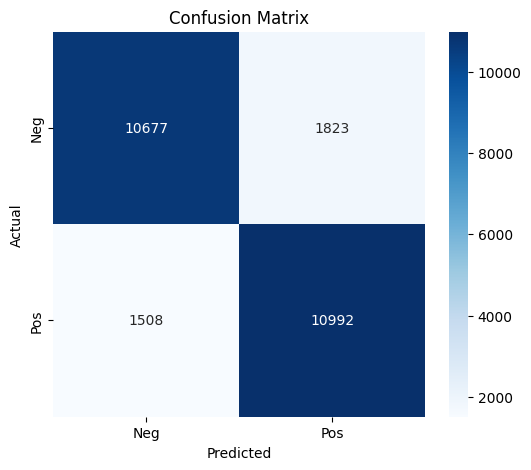

In [ ]:
#Q4)IMDB Sentiment Classification with LSTM
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load IMDB dataset (top 10,000 words only)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

# 2. Tokenize and pad sequences
maxlen = 200  # max length of reviews
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# 3. Build LSTM Model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 4. Train the model
model.fit(x_train, y_train, batch_size=128, epochs=3, validation_split=0.2)

# Predict
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# 5. Evaluation: Confusion Matrix and Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
